<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
data.shape # verificando a quantidade de linhas e colunas

(53940, 10)

In [3]:
# traduzindo as colunas para entender melhor

data.rename(columns={"carat": "Quilate",
                     "cut": "Corte",
                     "color": "Cor",
                     "clarity": "Clareza",
                     "depth": "Profundidade",
                     "table": "Tabela",
                     "price": "Preço"}, inplace=True)
data.head(5)

,Quilate,Corte,Cor,Clareza,Profundidade,Tabela,Preço,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Preço do diamante por tipo de corte'),
 Text(0.5, 0, 'Tipo de Corte'),
 Text(0, 0.5, 'Preço')]

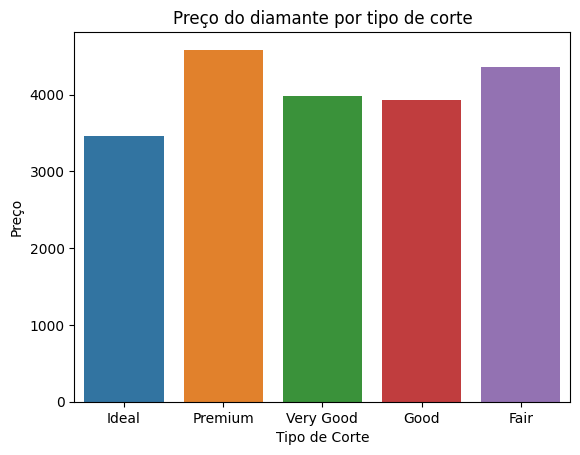

In [4]:
# gráfico do exercício 1

diamonds = sns.barplot(data=data, x="Corte", y="Preço", ci=None) # utilizando o gráfico de barras filtrando as colunas solicitadas
diamonds.set(title="Preço do diamante por tipo de corte", xlabel="Tipo de Corte", ylabel="Preço")

**Insight do gráfico 1**: Os cortes Premium e o Fair lideram como os mais caros comparado com os demais. O corte de menor valor é o Ideal. Os valores de todos os tipos de cortes são altos, passando dos 3000.

---

## 2\. Número de passageiros em dezembro por ano

In [5]:
import seaborn as sns

voos = sns.load_dataset("flights") # traduzindo os dados com a variável voos
voos.head(12)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [6]:
voos.shape # verificando a quantidade de linhas e colunas

(144, 3)

In [7]:
# traduzindo as colunas novamente

voos.rename(columns= {"year": "Ano",
            "month": "Mês",
            "passengers": "Passageiros"}, inplace=True)
voos.head(12)

,Ano,Mês,Passageiros
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [8]:
# filtrando os dados apenas os dados do mês de dezembro

dezembro = voos.loc[voos["Mês"] == "Dec"]
dezembro

,Ano,Mês,Passageiros
11,1949,Dec,118
23,1950,Dec,140
35,1951,Dec,166
47,1952,Dec,194
59,1953,Dec,201
71,1954,Dec,229
83,1955,Dec,278
95,1956,Dec,306
107,1957,Dec,336
119,1958,Dec,337


In [9]:
# outra forma de filtrar com a função query

dezembro = voos.query("Mês == 'Dec'")
dezembro

,Ano,Mês,Passageiros
11,1949,Dec,118
23,1950,Dec,140
35,1951,Dec,166
47,1952,Dec,194
59,1953,Dec,201
71,1954,Dec,229
83,1955,Dec,278
95,1956,Dec,306
107,1957,Dec,336
119,1958,Dec,337


In [10]:
dezembro.shape # verificando a quantidade de linhas e colunas

(12, 3)

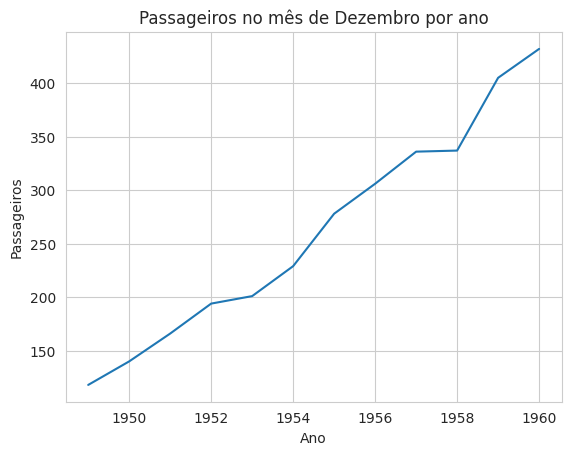

In [11]:
# gráfico do exercício 2

# dúvida - como fazer com que apareça na legenda apenas o mês de dezembro?

with sns.axes_style("whitegrid"):
    grafico = sns.lineplot(data=dezembro, x="Ano", y="Passageiros", palette="pastel")
    grafico.set(title="Passageiros no mês de Dezembro por ano", xlabel="Ano", ylabel="Passageiros")

**Insight do gráfico 2**: Podemos analisar que no ano de 1960 tivemos um recorde de passageiros no mês de dezembro pelos últimos 10 anos. No ano de 1958 começou a ter uma procura significativa e só aumentou. A busca por passagens está cada vez maior com o passar dos anos, acredito que o motivo desse aumento seja pelo fato da grande maioria entrar em recesso neste mês, ocasionando em datas comemorativas, etc.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [12]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

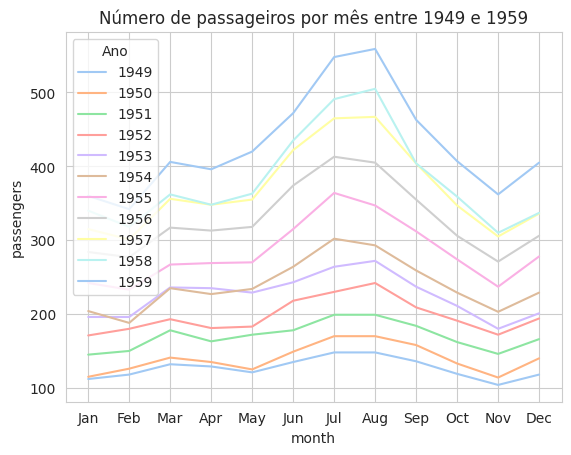

In [13]:
# gráfico do exercício 3

flights = data.query("1949 <= year < 1960")

with sns.axes_style("whitegrid"):
    grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="pastel")
    grafico.set(title="Número de passageiros por mês entre 1949 e 1959")
    grafico.get_legend().set_title("Ano")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Número de passageiros por mês entre 1949 e 1959'),
 Text(0, 0.5, 'Passageiros'),
 Text(0.5, 0, 'Mês')]

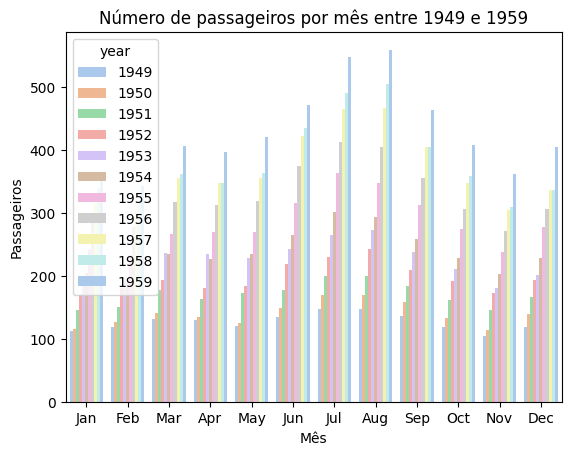

In [14]:
# utilizando gráfico de barra

grafico = sns.barplot(data=flights, x="month", y="passengers", hue="year", palette="pastel")
grafico.set(title="Número de passageiros por mês entre 1949 e 1959", ylabel="Passageiros", xlabel="Mês")

**Insight do gráfico 3**: Podemos analisar que os meses de pico que mais tem procura durante o ano é entre Julho e Agosto em todos esses anos, chegando em Setembro a queda ocorre naturalmente, a partir de Novembro começa novamente a procura e o aumento de passageiros. 

---